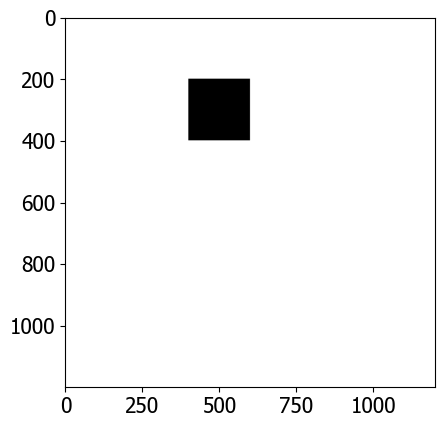

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def create_map(width, height, obstacles=[]):
    # Create a white background
    map_array = np.ones((height, width), dtype=np.uint8) * 255
    
    # Add black obstacles
    for obstacle in obstacles:
        x, y, obstacle_width, obstacle_height = obstacle
        map_array[y:y + obstacle_height, x:x + obstacle_width] = 0

    return map_array

def save_map_to_npy(map_array, file_path):
    np.save(file_path, map_array)

def visualize_map(map_array):
    plt.imshow(map_array, cmap='gray')
    plt.show()

# Example usage:
map_width = 1200
map_height = 1200

# Initial obstacle positions and sizes
obstacles = [(400, 200, 200 , 200)]

# Create and save the map
map_array = create_map(map_width, map_height, obstacles)
#save_map_to_npy(map_array, 'Downloads/map_with_obstacles.npy')

# Visualize the map
visualize_map(map_array)


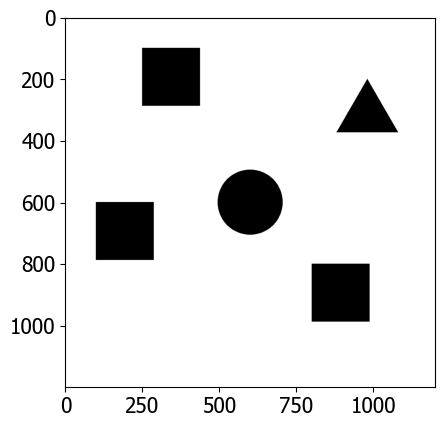

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle, polygon, disk

def create_map(width, height, shapes=[]):
    # Create a white background
    map_array = np.ones((height, width), dtype=np.uint8) * 255
    
    for shape in shapes:
        shape_type, params = shape[0], shape[1:]
        
        if shape_type == 'rectangle':
            rr, cc = rectangle(start=params[:2], end=(params[0] + params[2], params[1] + params[3]), extent=None, shape=map_array.shape)
            map_array[rr, cc] = 0
        elif shape_type == 'triangle':
            rr, cc = polygon([params[0], params[0] + params[2], params[0] + params[2]], 
                             [params[1], params[1] + params[3]//2 , params[1] - params[3]//2], shape=map_array.shape)
            map_array[rr, cc] = 0
        if shape_type == 'disk':
            cy, cx, radius = params
            rr, cc = disk((cy, cx), radius, shape=map_array.shape)
            map_array[rr , cc] = 0
#         elif shape_type == 'circle':
#             rr, cc = circle(params[1], params[0], params[2], shape=map_array.shape)
#             map_array[rr, cc] = 0

    return map_array

def save_map_to_npy(map_array, file_path):
    np.save(file_path, map_array)

def visualize_map(map_array):
    plt.imshow(map_array, cmap='gray')
    plt.show()

# Example usage:
map_width = 1200
map_height = 1200

# Initial obstacle positions and sizes
obstacles = [(400, 200, 200, 200)]

# Additional shapes (triangle, square, circle, square, circle)
shapes = [('triangle', 200, 980, 173, 200), # h = 200 , b = 231
          ('rectangle', 800, 800, 187, 187),
          ('rectangle', 100, 250, 187, 187),
          ('rectangle', 600, 100, 187, 187),
          ('disk', 600, 600, 105.5)]

# Create and save the map
map_array = create_map(map_width, map_height, obstacles + shapes)
#save_map_to_npy(map_array, 'Downloads/map_with_shapes.npy')

# Visualize the map
visualize_map(map_array)


In [ ]:
#For rectangle we need starting row coordinate and starting column coordinate and we also need its height and width
#width increases to the right and the height increases downwards

#For triangle we need the top two coordinates, the height and base length

#for disk just the center and radius

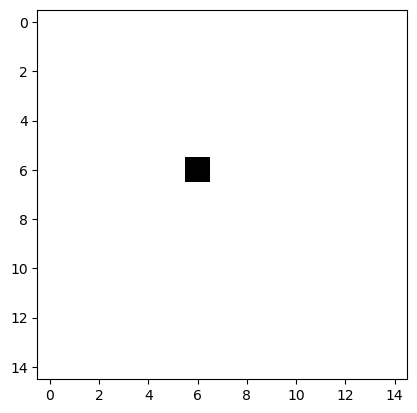

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a white background image
image = np.ones((15, 15), dtype=np.uint8) * 255

# Define the coordinates for the black square
square_size = 1
square_center = (6, 6)  # Center of the image

# Calculate the top-left corner of the square
square_top_left = (square_center[0] - square_size // 2, square_center[1] - square_size // 2)

# Draw the black square on the image
image[square_top_left[1]:square_top_left[1] + square_size, square_top_left[0]:square_top_left[0] + square_size] = 0

# Display the binary image
plt.imshow(image, cmap='gray')
plt.show()


In [9]:
print(1 // 2)

0


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random


list_images = []

for i in range (10):
    img = np.ones((15, 15), dtype=np.uint8) * 255
    for l in range(7):
        choice1 = ['square', 'rectangle']
        shape = random.choice(choice1)
        if (shape == 'rectangle'):
            choice2 = ['length' , 'breadth']
            dim = random.choice(choice2)
            if (dim == 'length') :
                choice3 = ['one' , 'two']
                variance = random.choice(choice3)
                if(variance == 'one'):
                    x = random.randint(0, 13)
                    y = random.randint(4 , 14)
                    x_top = x
                    y_top = y - 4
                    img[x_top : x_top + 2 , y_top : y_top  + 5] = 0
                    print('area of rectangle in 1')
                    print((x_top + 1 - x_top) * (y_top  + 4 - y_top))
                if(variance == 'two'):
                    x = random.randint(1, 13)
                    y = random.randint(1, 13)
                    x_top = x - 2 // 2
                    y_top = y - 2 // 2
                    img[x_top : x_top + 3 , y_top : y_top + 3] = 0
                    print('area of square in 2')
                    print((x_top + 2 - x_top) * (y_top  + 2 - y_top))
            if (dim == 'breadth'):
                choice3 = ['one' , 'two']
                variance = random.choice(choice3)
                if (variance == 'two'):
                    x = random.randint(1, 13)
                    y = random.randint(1, 13)
                    x_top = x - 2 // 2
                    y_top = y - 2 // 2
                    img[x_top : x_top + 3 , y_top : y_top + 3] = 0
                    print('area of square in 3')
                    print((x_top + 2 - x_top) * (y_top  + 2 - y_top))
                if (variance == 'one'):
                    y = random.randint(1, 14)
                    x = random.randint(0 , 10)
                    x_top = x
                    y_top = y - 1
                    img[x_top : x_top + 5 , y_top : y_top + 2] = 0
                    print('area of rectangle in 4')
                    print((x_top + 4 - x_top) * (y_top  + 1 - y_top))
        if (shape == 'square'):
            x = random.randint(1, 13)
            y = random.randint(1, 13)
            x_top = x - 2 // 2
            y_top = y - 2 // 2
            img[x_top : x_top + 3 , y_top : y_top + 3] = 0
            print('area of square in 4')
            print((x_top + 2 - x_top) * (y_top  + 2 - y_top))
    list_images.append(img) 
    print('Iteration over')
            
                
                
                
                
                
                
                
                
                    

area of square in 4
4
area of rectangle in 1
4
area of square in 4
4
area of square in 4
4
area of square in 4
4
area of rectangle in 4
4
area of square in 4
4
Iteration over
area of square in 3
4
area of square in 4
4
area of square in 2
4
area of square in 2
4
area of square in 4
4
area of square in 3
4
area of square in 3
4
Iteration over
area of rectangle in 1
4
area of square in 4
4
area of rectangle in 4
4
area of square in 4
4
area of square in 2
4
area of rectangle in 4
4
area of square in 4
4
Iteration over
area of square in 4
4
area of square in 4
4
area of square in 2
4
area of square in 4
4
area of square in 2
4
area of rectangle in 1
4
area of square in 4
4
Iteration over
area of rectangle in 4
4
area of square in 4
4
area of square in 2
4
area of square in 3
4
area of rectangle in 1
4
area of square in 4
4
area of square in 4
4
Iteration over
area of square in 4
4
area of rectangle in 1
4
area of square in 3
4
area of square in 3
4
area of square in 3
4
area of square in 

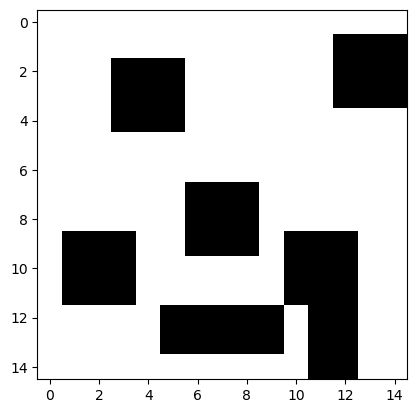

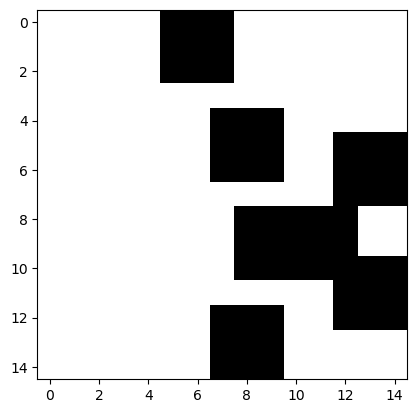

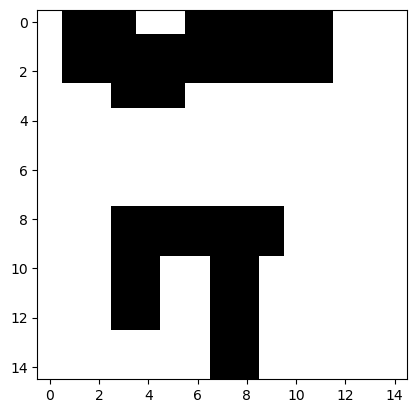

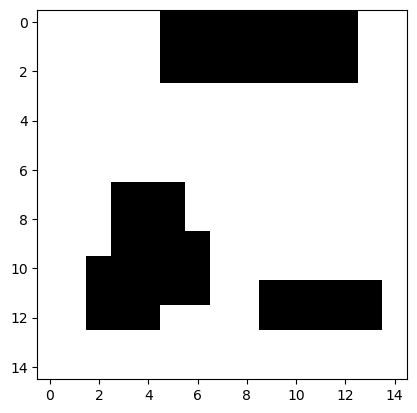

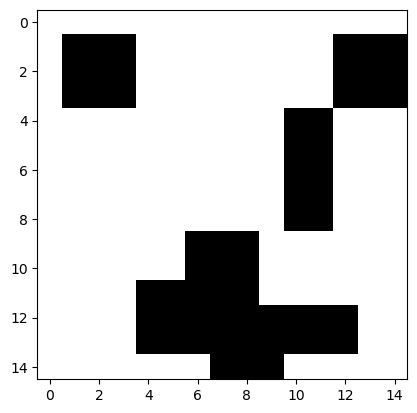

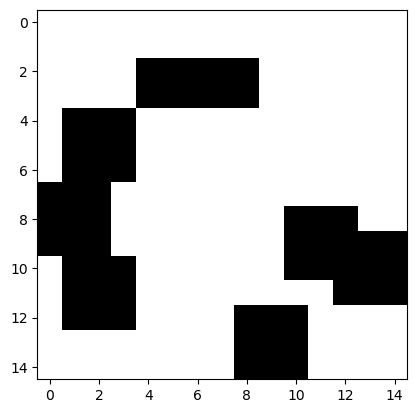

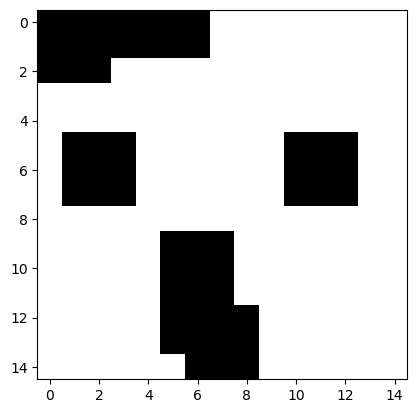

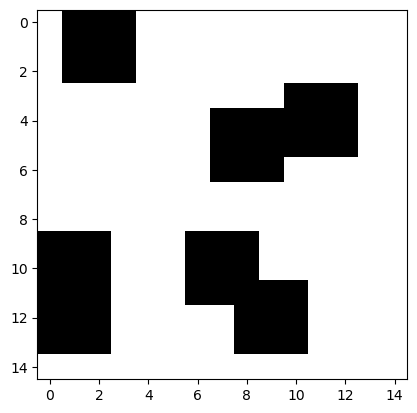

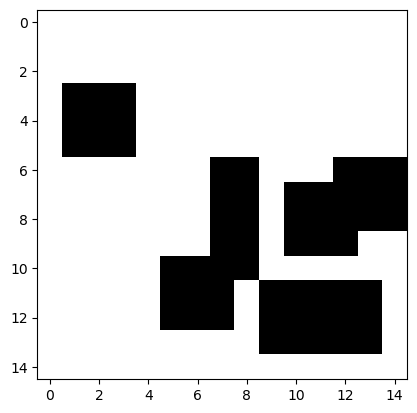

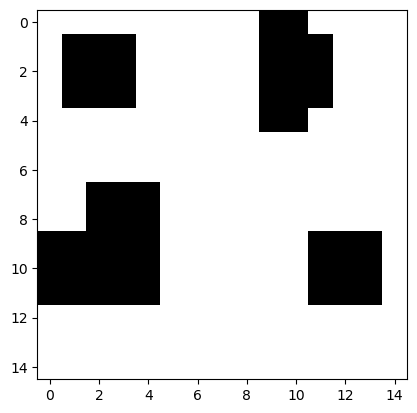

In [23]:

for img in list_images:
    plt.imshow(img , cmap = 'gray')
    plt.show()

Total number of pixels: 16384
128 128
(128, 128)


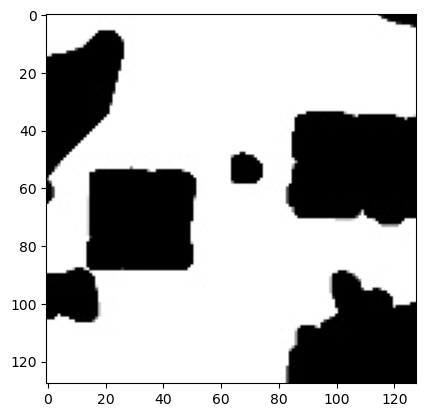

In [10]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread(r"C:\Users\Navdeep\Downloads\0.jpg")

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


height, width= gray_image.shape

total_pixels = height * width

print("Total number of pixels:", total_pixels)
print(height , width)
print(gray_image.shape)

plt.imshow(gray_image , cmap = 'gray')

In [112]:
#The following code is related to autoencoders
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable

In [113]:
#Desining the data loader
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import cv2
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = os.listdir(root_dir)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_paths[idx])
        image = cv2.imread(img_name , cv2.IMREAD_GRAYSCALE)
        
        if self.transform:
            image = self.transform(image)
            
        return image
    
    
class ToCudaTransform(object):
    def __call__(self, tensor):
        if torch.cuda.is_available():
            return tensor.to(torch.device("cuda"))
        else:
            return tensor

        
root_dir = r'C:\Users\Navdeep\Downloads\images\images'
transform = transforms.Compose([
    transforms.ToTensor(),
    ToCudaTransform()  # Add custom transform to move tensor to CUDA
])

custom_dataset = CustomDataset(root_dir=root_dir, transform=transform)

data_loader = DataLoader(custom_dataset, batch_size=10, shuffle=True, drop_last=True)


# images , names = next(iter(data_loader))

# image = images[0]


# image = image.numpy()

# image = np.transpose(image, (1, 2, 0))

# print(names)
# plt.imshow(image)

In [114]:
#Designing the encoder decoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1), 
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1), 
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64 , 128 , 3 , stride = 2 , padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 , 256 , 8)
        )
        
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 8),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    

In [115]:
mse_loss = nn.MSELoss()
lam=1e-3
def loss_function(W, x, recons_x, h):
    mse = mse_loss(recons_x, x)
    # Since: W is shape of N_hidden x N. So, we do not need to transpose it as
    # opposed to #1
    dh = h * (1 - h) # Hadamard product produces size N_batch x N_hidden
#     print('dh shape')
#     print(dh.shape)
    # Sum through the input dimension to improve efficiency, as suggested in #1
    w_sum = torch.sum(Variable(W)**2, dim=1)
#     print('w_sum shape')
#     print(w_sum.shape)
    # unsqueeze to avoid issues with torch.mv
    w_sum = w_sum.unsqueeze(1) # shape N_hidden x 1
    contractive_loss = torch.sum(torch.mm(dh**2, w_sum), 0)
    return mse + contractive_loss.mul_(lam)

In [116]:
autoencoder = Autoencoder()
if torch.cuda.is_available():
    autoencoder = autoencoder.to(torch.device("cuda"))

In [118]:
#writing the training loop
num_epochs = 1000
outputs = []
params = list(autoencoder.parameters())
optimizer = torch.optim.Adagrad(params)
for epoch in range(num_epochs):
    for (img) in data_loader:
        # img = img.reshape(-1, 28*28) # -> use for Autoencoder_Linear
        h = autoencoder.encoder(img)
#         print('h before conversion')
#         print(h.shape)
        recon = autoencoder.decoder(h)
        encoder_state_dict = autoencoder.encoder.state_dict()
        encoder_keys = encoder_state_dict.keys()
        W = encoder_state_dict['8.weight']
#         print('W shape before conversion')
#         print(W.shape)
        W = W.view(256 , -1)
#         print('W shape after conversion')
#         print(W.shape)
#         print('h after conversion')
        h = h.view(10, -1)
#         print(h.shape)
        loss = loss_function(W ,img ,recon , h)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))
    
    
torch.save(autoencoder.encoder.state_dict(), r'Downloads\cae_encoder.pkl')

Epoch:1, Loss:0.1332
Epoch:2, Loss:0.0601
Epoch:3, Loss:0.0331
Epoch:4, Loss:0.0311
Epoch:5, Loss:0.0288
Epoch:6, Loss:0.0307
Epoch:7, Loss:0.0214
Epoch:8, Loss:0.0213
Epoch:9, Loss:0.0179
Epoch:10, Loss:0.0249
Epoch:11, Loss:0.0208
Epoch:12, Loss:0.0168
Epoch:13, Loss:0.0178
Epoch:14, Loss:0.0161
Epoch:15, Loss:0.0146
Epoch:16, Loss:0.0153
Epoch:17, Loss:0.0151
Epoch:18, Loss:0.0120
Epoch:19, Loss:0.0129
Epoch:20, Loss:0.0132
Epoch:21, Loss:0.0129
Epoch:22, Loss:0.0168
Epoch:23, Loss:0.0127
Epoch:24, Loss:0.0140
Epoch:25, Loss:0.0142
Epoch:26, Loss:0.0151
Epoch:27, Loss:0.0137
Epoch:28, Loss:0.0106
Epoch:29, Loss:0.0108
Epoch:30, Loss:0.0094
Epoch:31, Loss:0.0134
Epoch:32, Loss:0.0108
Epoch:33, Loss:0.0121
Epoch:34, Loss:0.0119
Epoch:35, Loss:0.0104
Epoch:36, Loss:0.0101
Epoch:37, Loss:0.0089
Epoch:38, Loss:0.0082
Epoch:39, Loss:0.0102
Epoch:40, Loss:0.0093
Epoch:41, Loss:0.0101
Epoch:42, Loss:0.0093
Epoch:43, Loss:0.0108
Epoch:44, Loss:0.0102
Epoch:45, Loss:0.0104
Epoch:46, Loss:0.00

C:\Users\Navdeep\AppData\Local\Temp\ipykernel_13076\4276901194.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(9, 2))


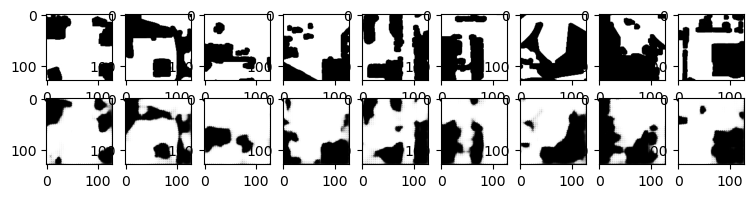

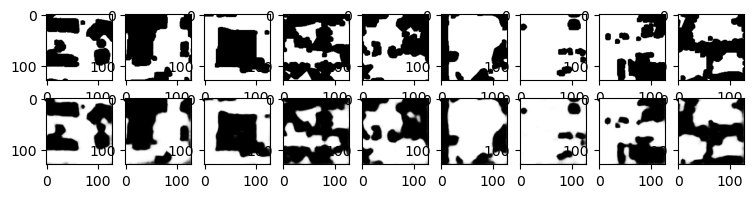

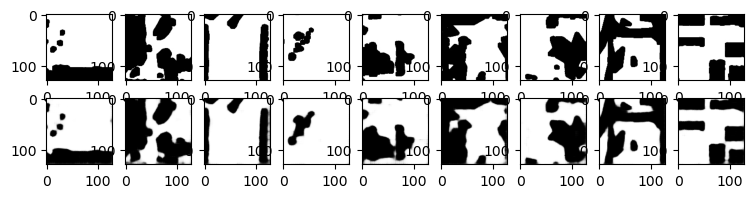

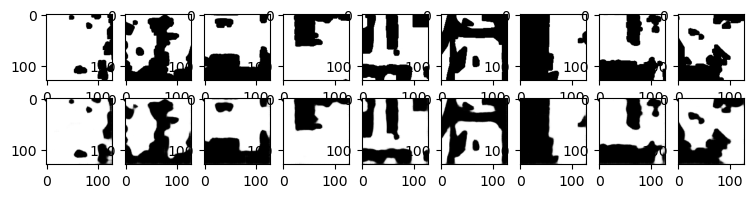

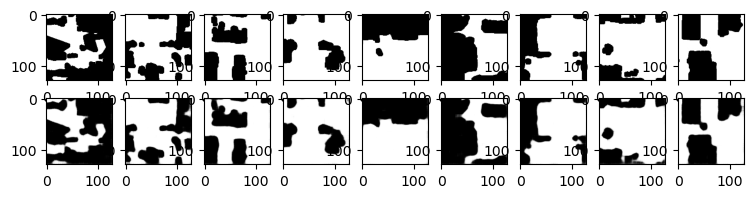

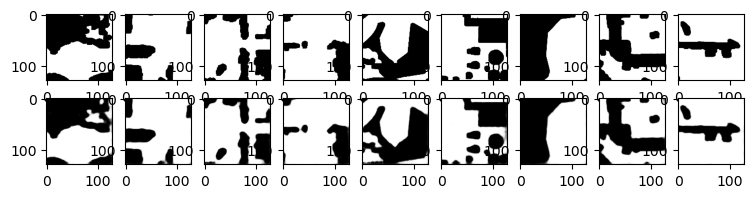

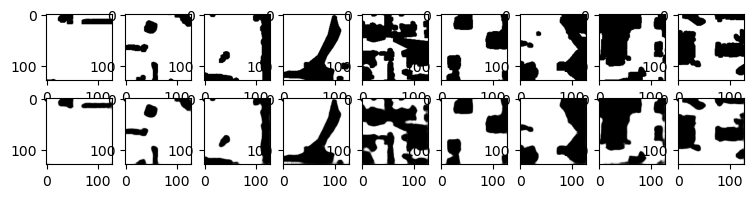

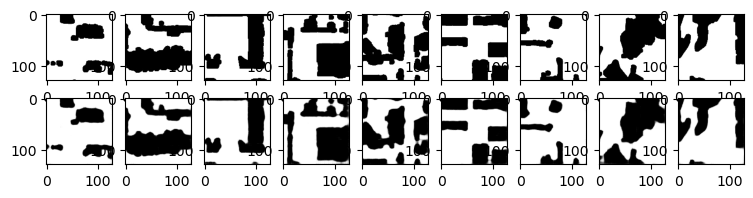

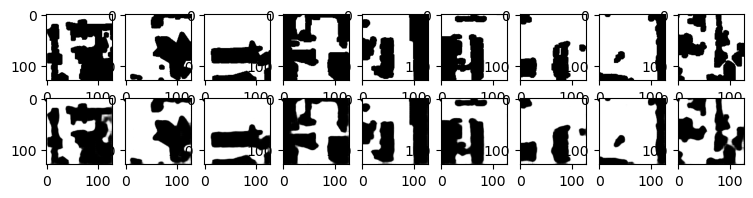

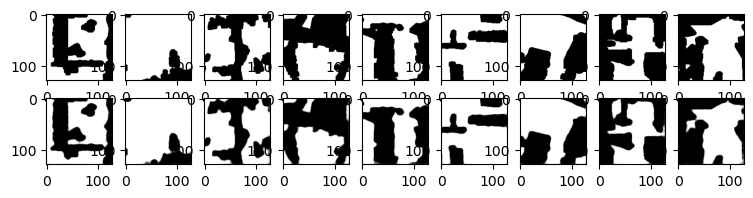

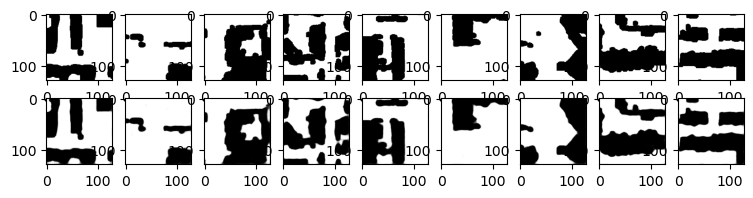

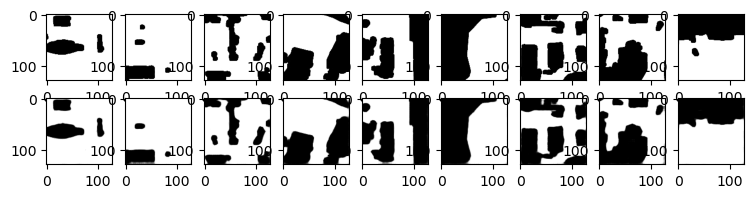

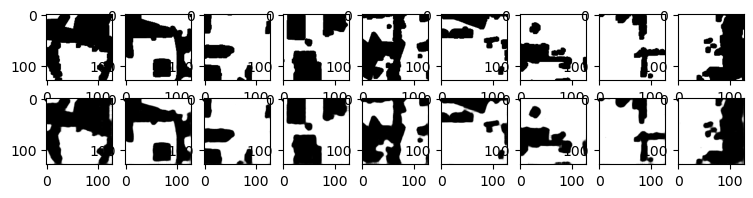

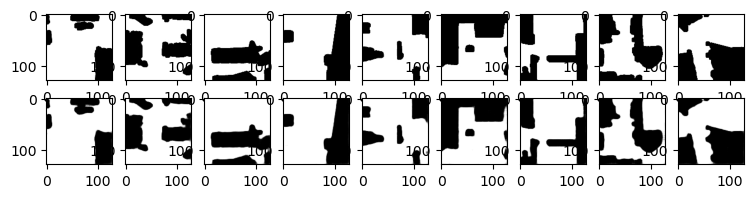

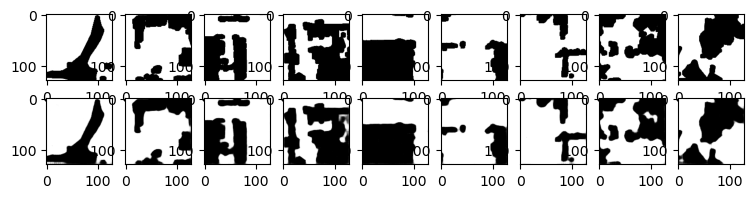

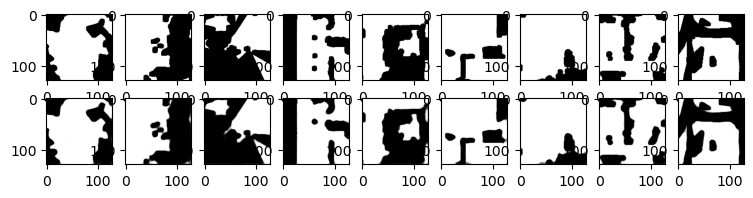

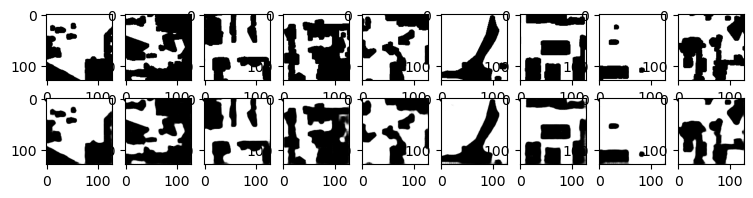

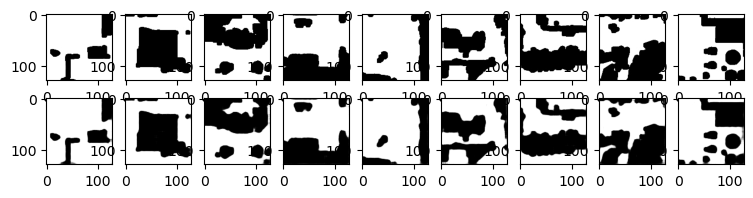

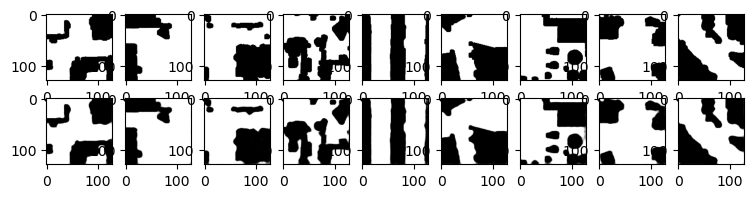

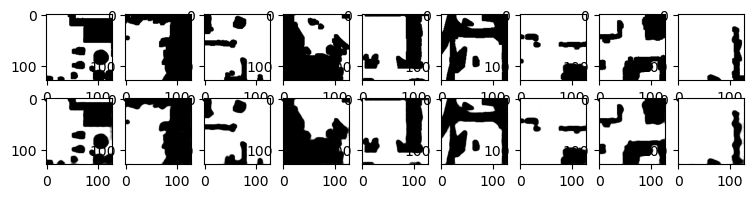

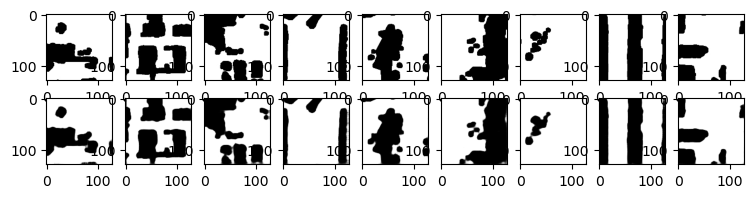

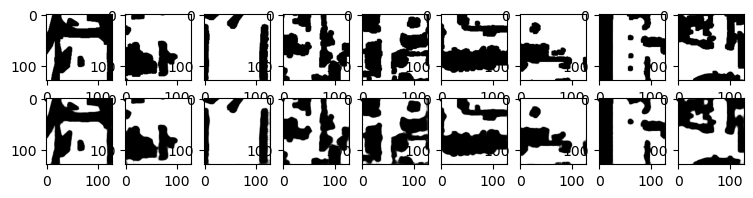

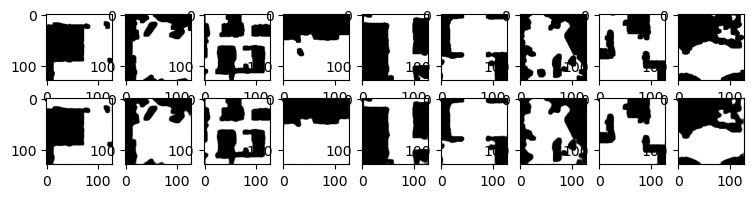

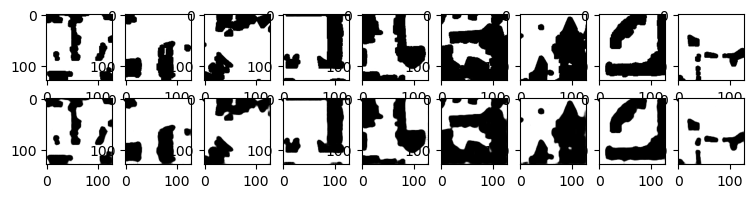

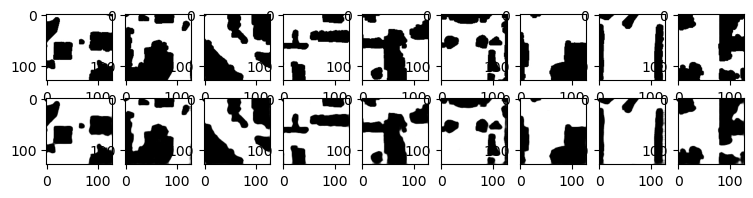

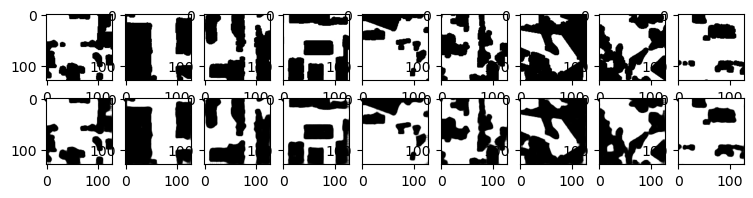

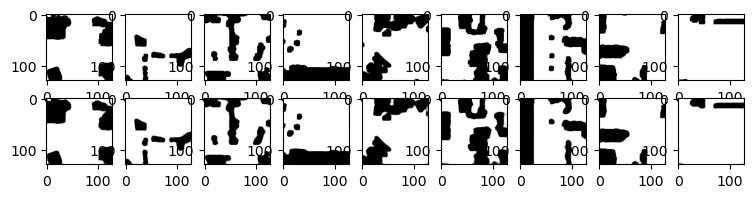

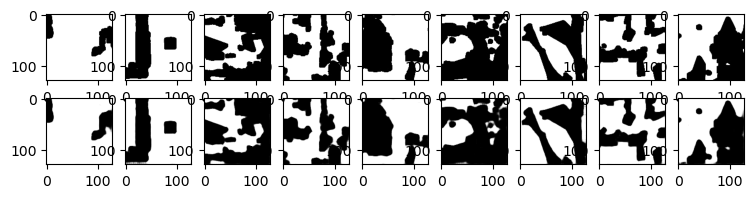

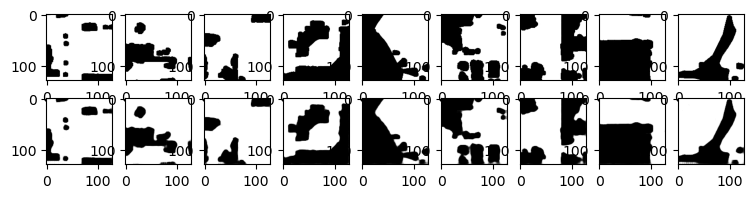

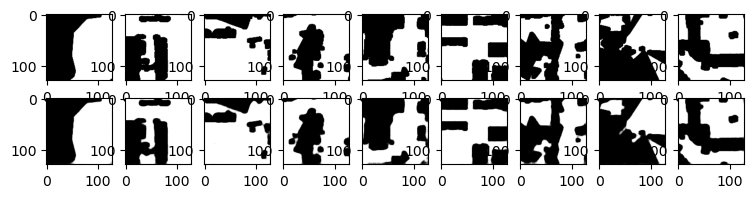

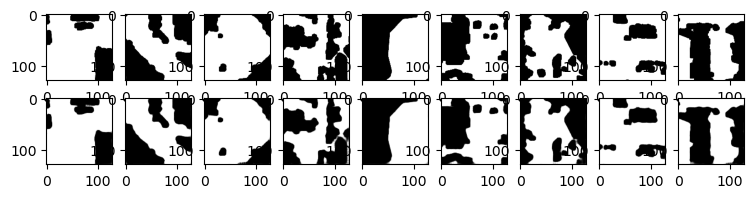

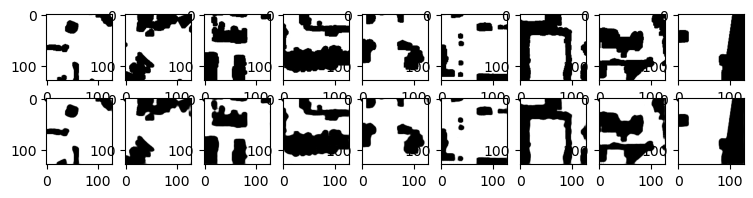

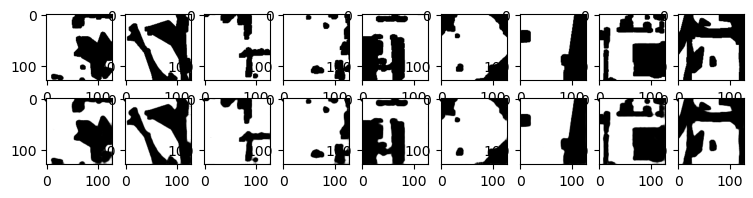

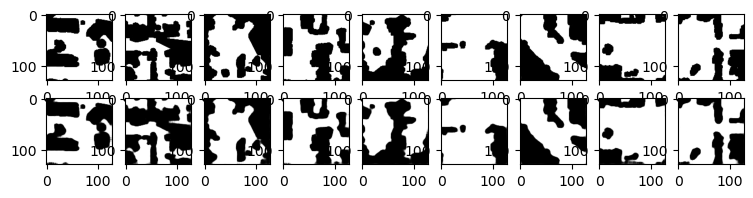

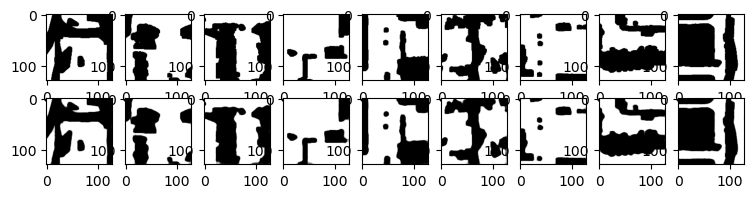

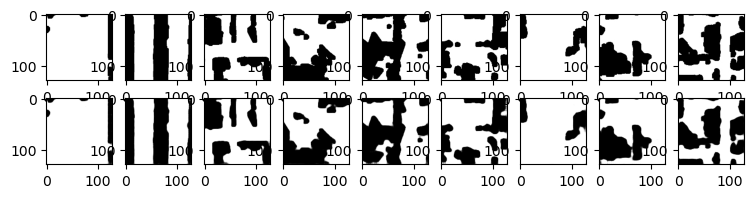

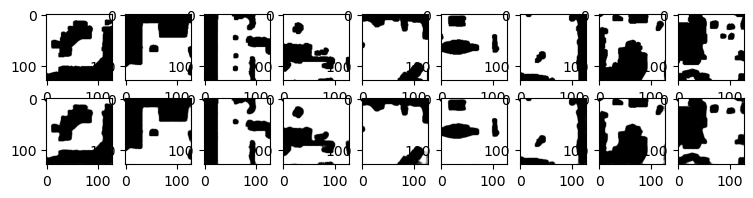

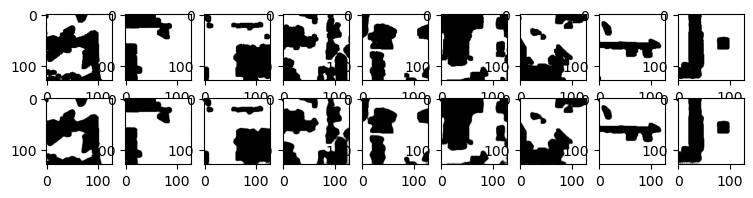

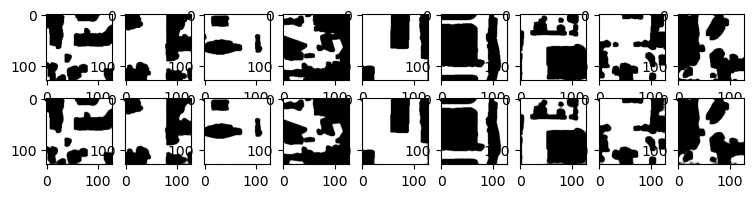

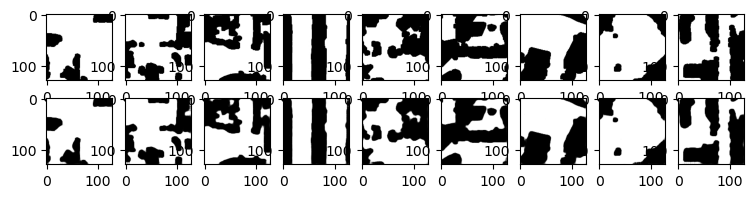

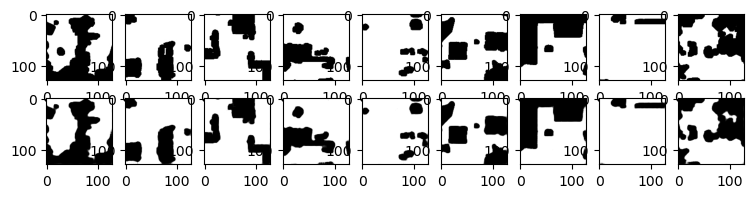

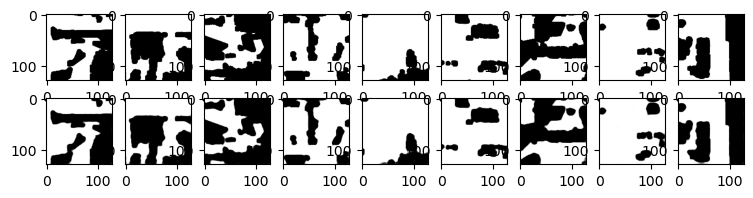

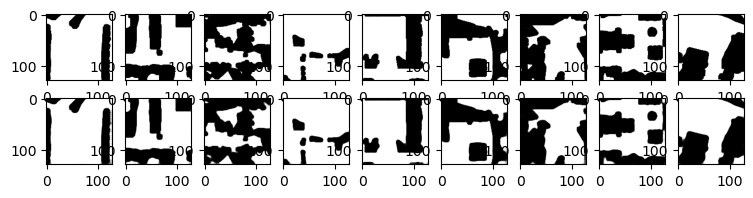

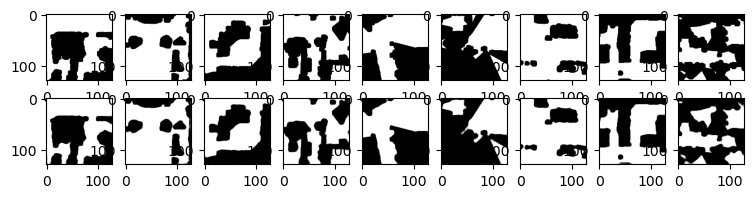

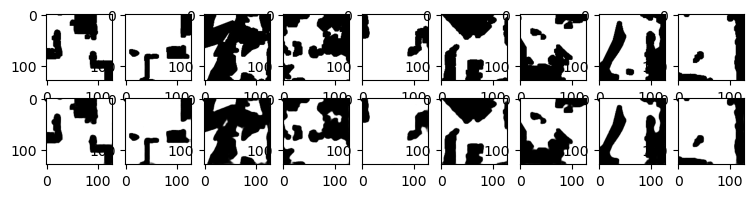

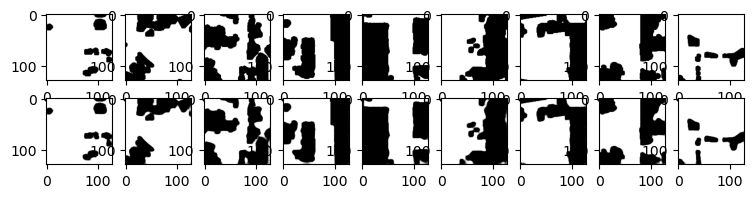

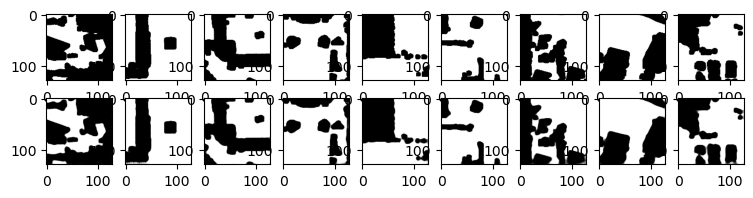

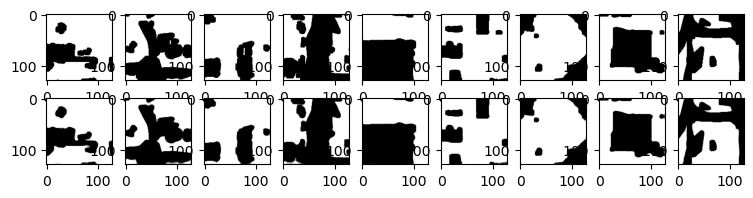

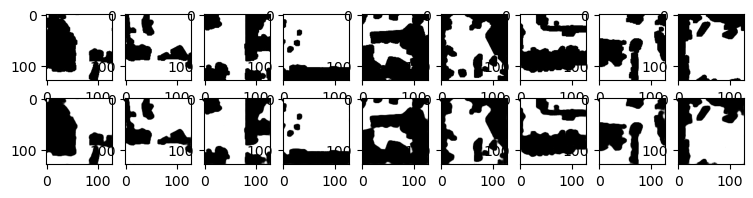

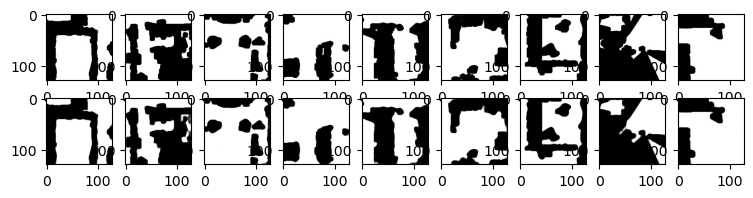

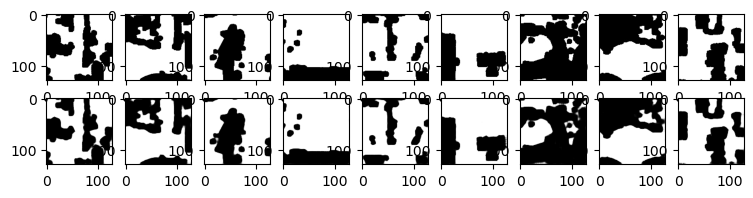

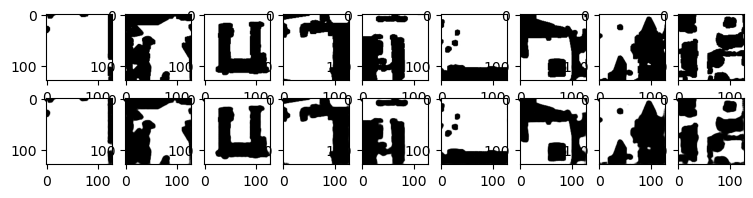

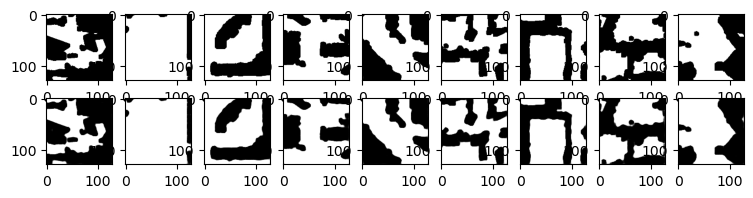

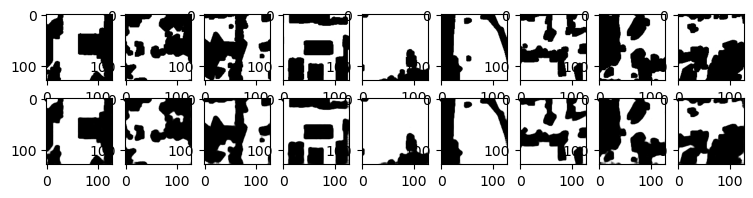

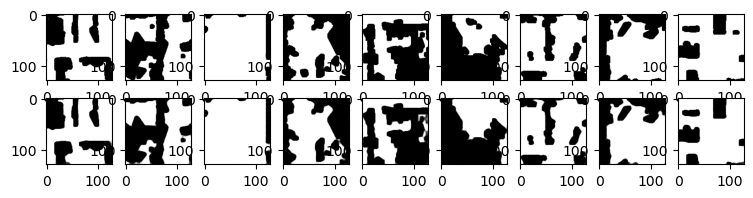

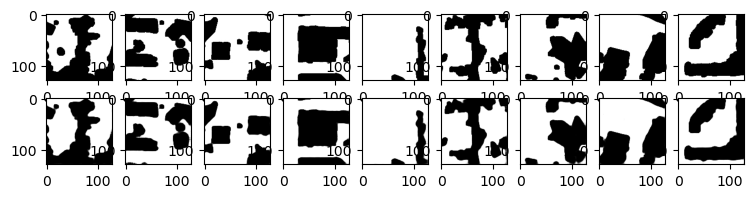

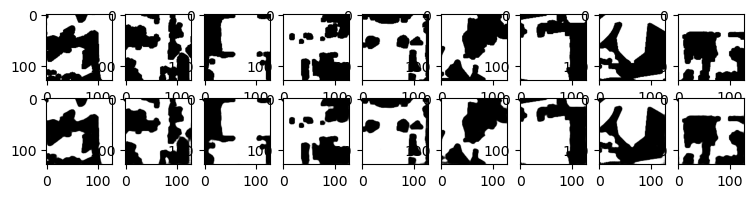

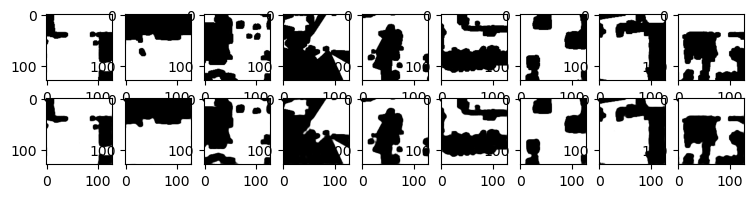

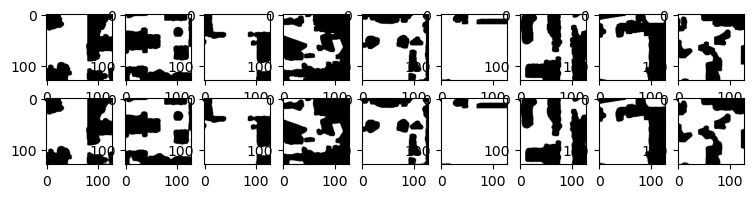

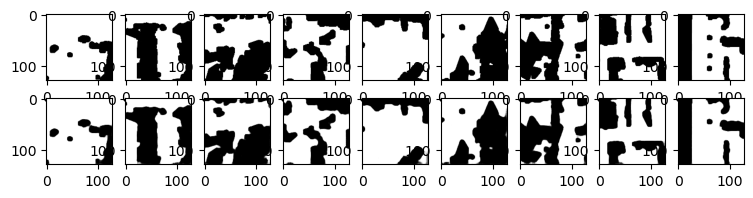

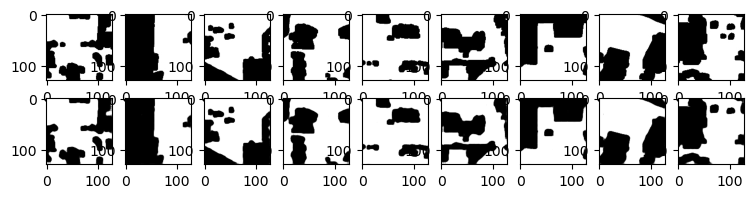

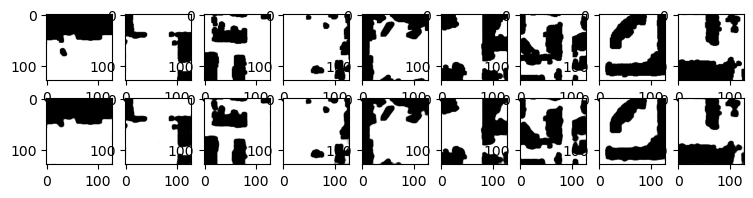

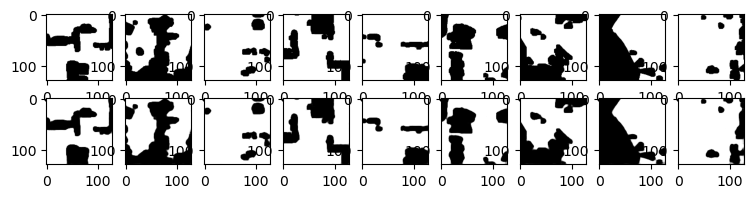

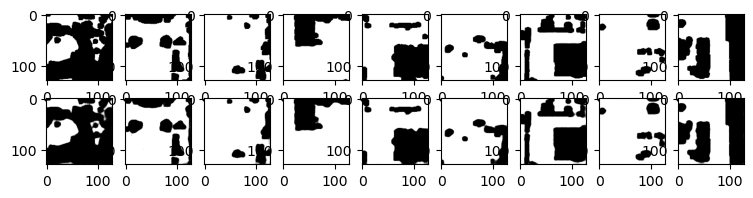

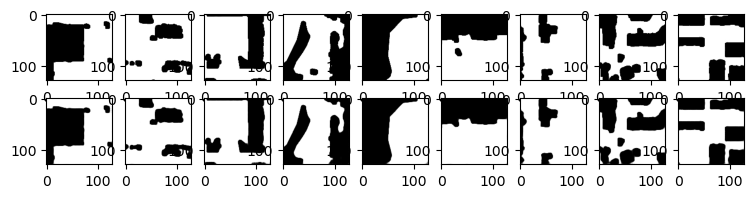

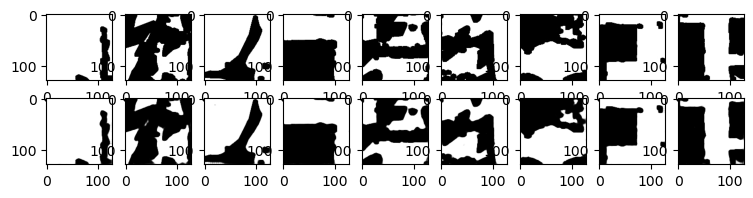

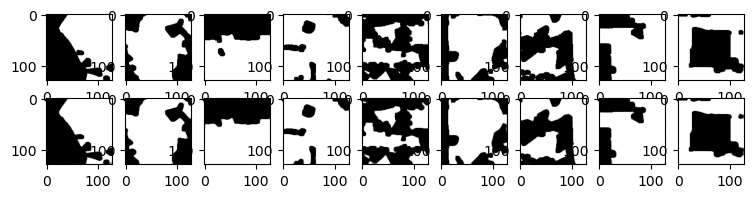

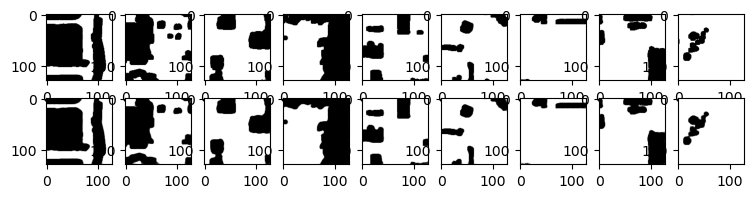

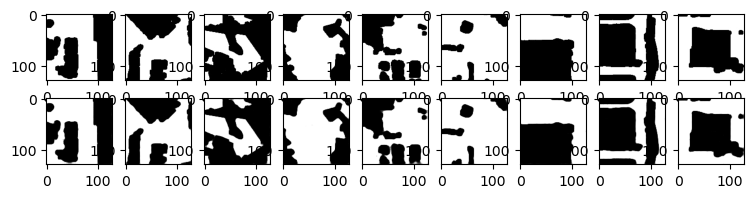

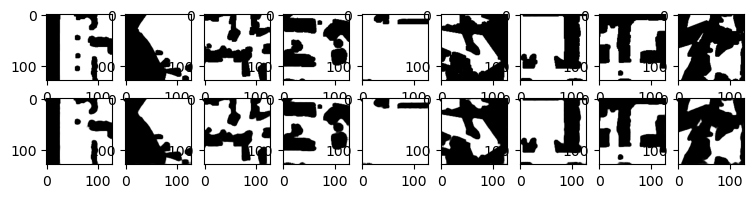

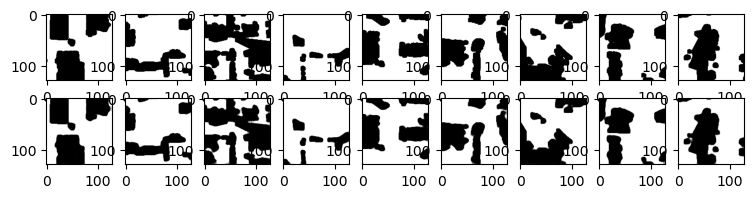

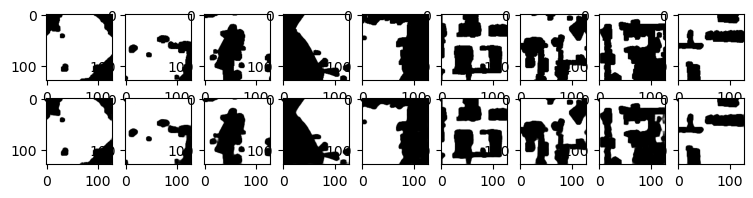

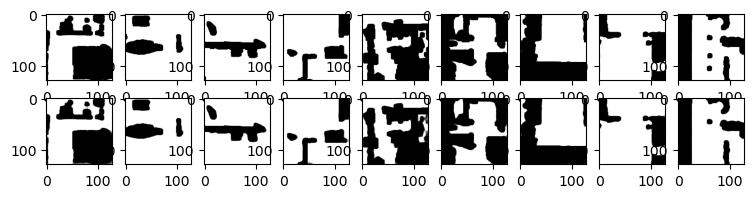

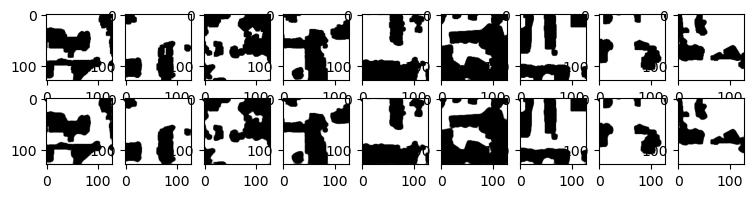

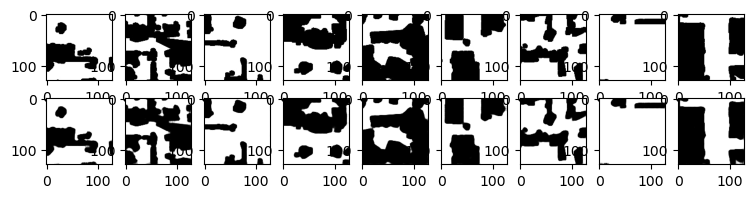

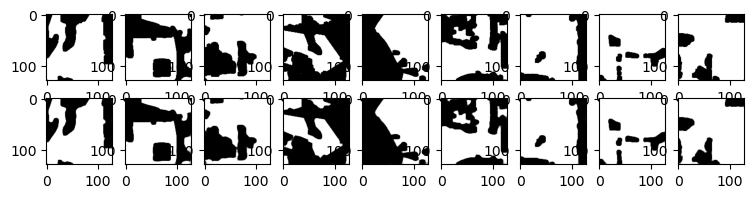

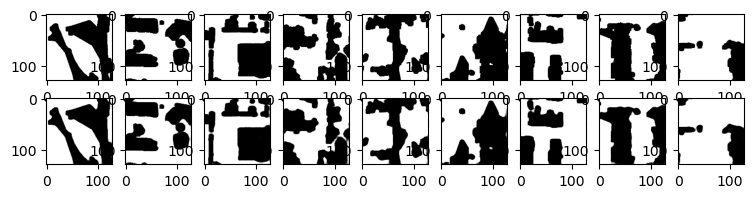

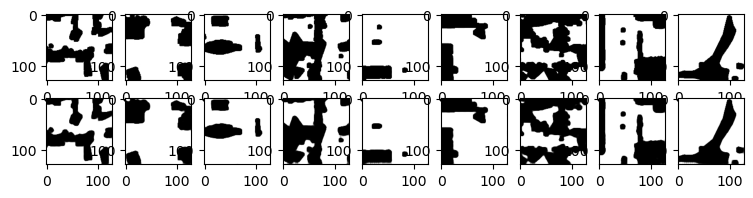

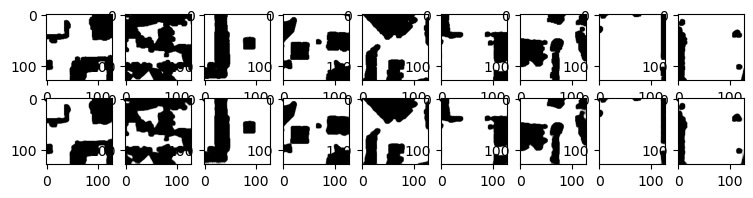

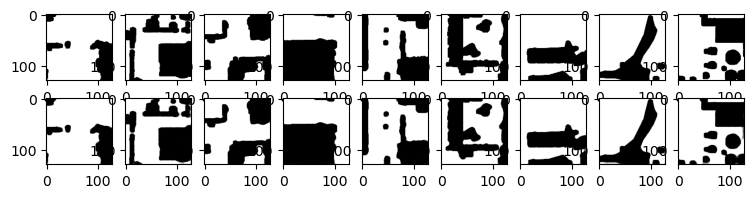

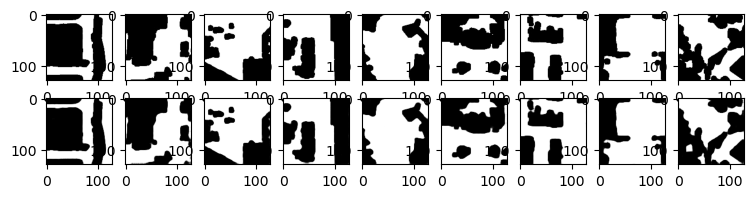

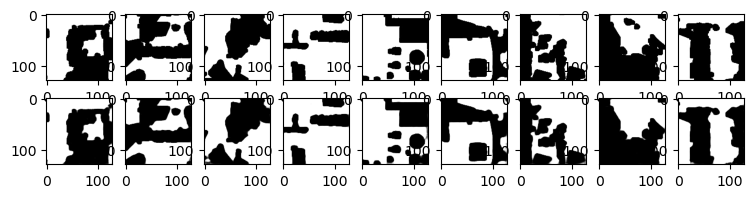

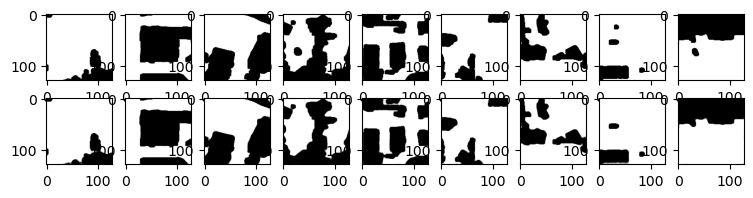

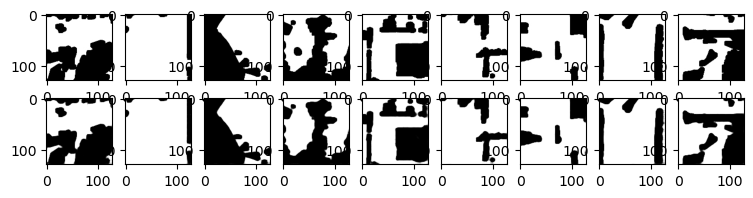

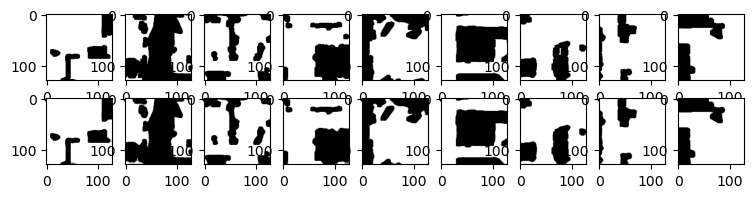

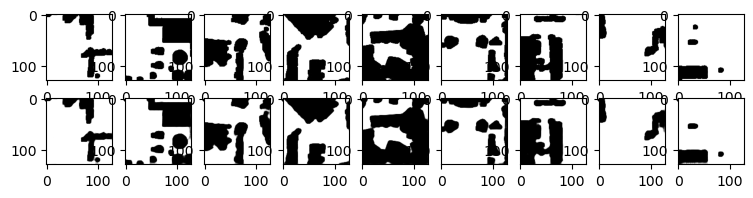

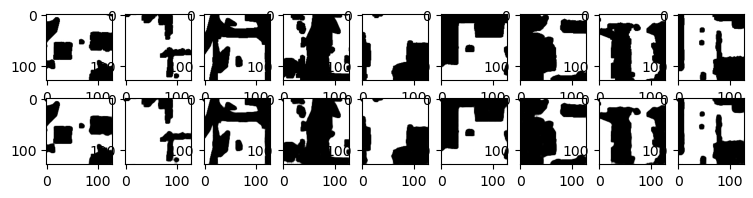

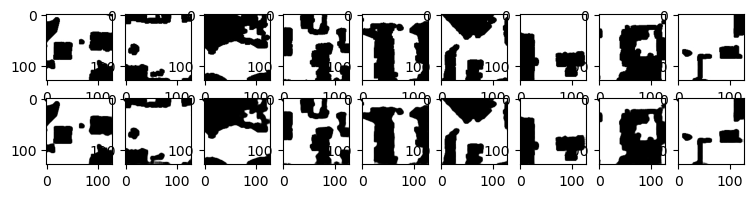

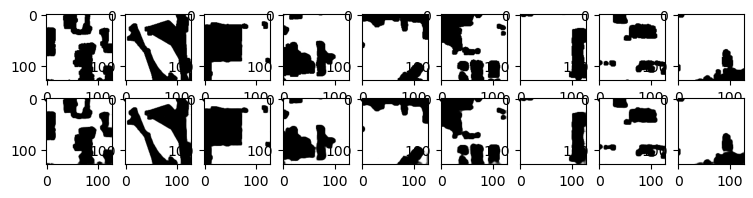

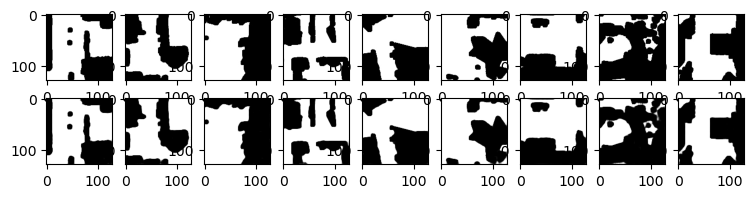

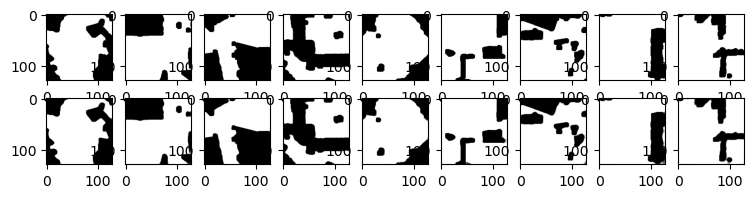

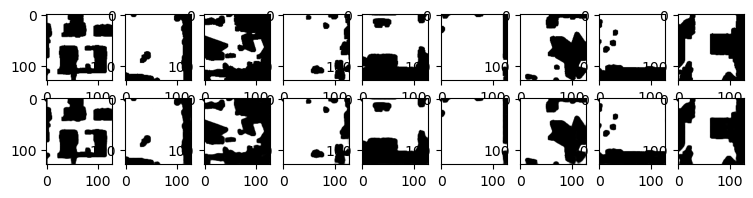

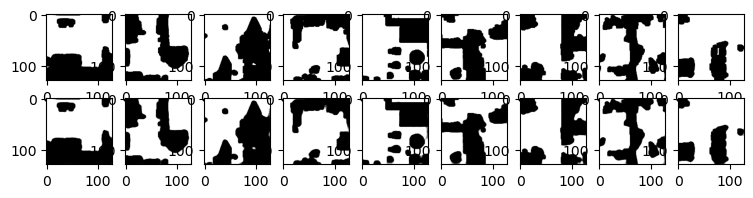

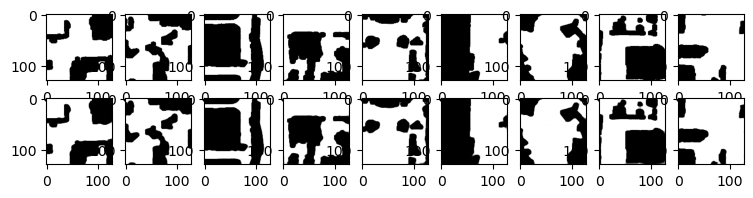

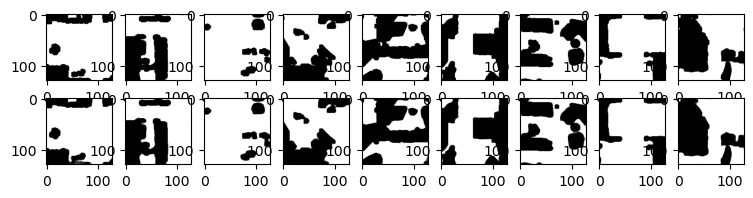

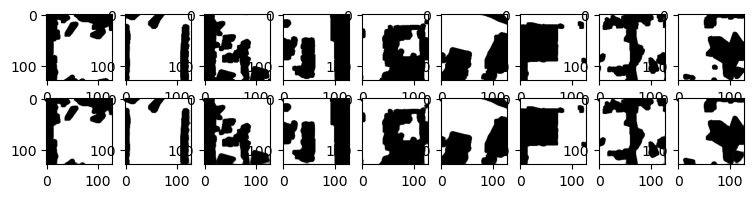

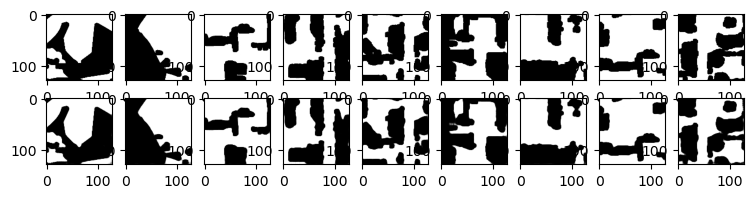

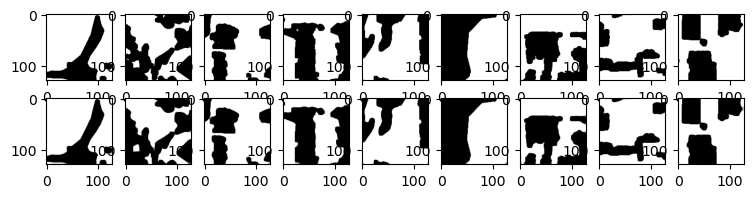

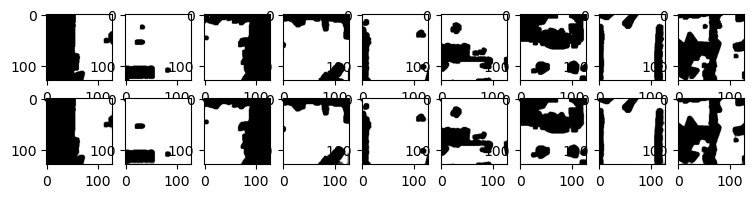

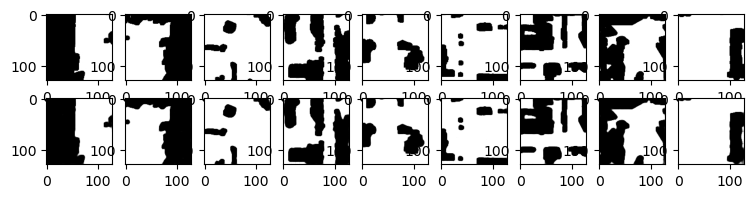

In [119]:
for k in range(0, num_epochs, 10):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].cpu().detach().numpy()
    recon = outputs[k][2].cpu().detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        # item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])